<a href="https://colab.research.google.com/github/manasayadlapalli/273/blob/main/cmpe_255_Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Created project cmpe-255, enabled billing and BigQuery API. Authenticated GCP credentials during run time


In [3]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


Enabled data table display

In [4]:
%load_ext google.colab.data_table

Declared the Cloud project ID for notebook purpose

In [5]:
project_id = 'cmpe-255-362622'

In [6]:
!gcloud config list

[component_manager]
disable_update_check = True
[core]
account = saimanasa.yadlapalli@sjsu.edu
project = cmpe-255-362622

Your active configuration is: [default]


In [7]:
!gcloud config set project 'cmpe-255-362622'

Updated property [core/project].


In [8]:
!gcloud config list project

[core]
project = cmpe-255-362622

Your active configuration is: [default]


# Public dataset
Stack Overflow is the largest online community for programmers to learn, share their knowledge, and advance their careers. Updated on a quarterly basis, this BigQuery dataset includes an archive of Stack Overflow content, including posts, votes, tags, and badges. This dataset is updated to mirror the Stack Overflow content on the Internet Archive, and is also available through the Stack Exchange Data Explorer.

Data set is 33.14 GB Long term storage size, Number of rows 20,890,054.
Check schema on  

In [9]:
from google.cloud import bigquery

In [10]:
#create client object
client = bigquery.Client(project = project_id)

In [11]:
dataset_ref = client.dataset("noaa_gsod","bigquery-public-data")
dataset = client.get_dataset(dataset_ref)

In [12]:
tables = client.list_tables(dataset)

for table in tables:
  print(table.full_table_id)
  

bigquery-public-data:noaa_gsod.gsod1929
bigquery-public-data:noaa_gsod.gsod1930
bigquery-public-data:noaa_gsod.gsod1931
bigquery-public-data:noaa_gsod.gsod1932
bigquery-public-data:noaa_gsod.gsod1933
bigquery-public-data:noaa_gsod.gsod1934
bigquery-public-data:noaa_gsod.gsod1935
bigquery-public-data:noaa_gsod.gsod1936
bigquery-public-data:noaa_gsod.gsod1937
bigquery-public-data:noaa_gsod.gsod1938
bigquery-public-data:noaa_gsod.gsod1939
bigquery-public-data:noaa_gsod.gsod1940
bigquery-public-data:noaa_gsod.gsod1941
bigquery-public-data:noaa_gsod.gsod1942
bigquery-public-data:noaa_gsod.gsod1943
bigquery-public-data:noaa_gsod.gsod1944
bigquery-public-data:noaa_gsod.gsod1945
bigquery-public-data:noaa_gsod.gsod1946
bigquery-public-data:noaa_gsod.gsod1947
bigquery-public-data:noaa_gsod.gsod1948
bigquery-public-data:noaa_gsod.gsod1949
bigquery-public-data:noaa_gsod.gsod1950
bigquery-public-data:noaa_gsod.gsod1951
bigquery-public-data:noaa_gsod.gsod1952
bigquery-public-data:noaa_gsod.gsod1953


In [13]:
table_ref = dataset_ref.table("gsod2022")
table = client.get_table(table_ref)
table.schema

[SchemaField('stn', 'STRING', 'NULLABLE', 'Cloud - GSOD NOAA', ()),
 SchemaField('wban', 'STRING', 'NULLABLE', 'WBAN number where applicable--this is the historical "Weather Bureau Air Force Navy" number - with WBAN being the acronym', ()),
 SchemaField('date', 'DATE', 'NULLABLE', 'Date of the weather observations', ()),
 SchemaField('year', 'STRING', 'NULLABLE', 'The year', ()),
 SchemaField('mo', 'STRING', 'NULLABLE', 'The month', ()),
 SchemaField('da', 'STRING', 'NULLABLE', 'The day', ()),
 SchemaField('temp', 'FLOAT', 'NULLABLE', 'Mean temperature for the day in degrees Fahrenheit to tenths. Missing = 9999.9', ()),
 SchemaField('count_temp', 'INTEGER', 'NULLABLE', 'Number of observations used in calculating mean temperature', ()),
 SchemaField('dewp', 'FLOAT', 'NULLABLE', 'Mean dew point for the day in degreesm Fahrenheit to tenths.  Missing = 9999.9', ()),
 SchemaField('count_dewp', 'INTEGER', 'NULLABLE', 'Number of observations used in calculating mean dew point', ()),
 SchemaFi

# Global Surface Summary of the Day Weather Data

This public dataset was created by the National Oceanic and Atmospheric Administration (NOAA) and includes global data obtained from the USAF Climatology Center. This dataset covers GSOD data between 1929 and present (updated daily), collected from over 9000 stations.

Global summary of the day is comprised of a dozen daily averages computed from global hourly station data. Daily weather elements include mean values of: temperature, dew point temperature, sea level pressure, station pressure, visibility, and wind speed plus maximum and minimum temperature, maximum sustained wind speed and maximum gust, precipitation amount, snow depth, and weather indicators. With the exception of U.S. stations, 24-hour periods are based upon UTC times.

This public dataset is hosted in Google BigQuery and is included in BigQuery's 1TB/mo of free tier processing.

In [14]:
query1 ="""
#standardSQL
SELECT
  max,
  (max-32)*5/9 celsius,
  mo,
  da,
  state,
  stn,
  name
FROM (
  SELECT
    max,
    mo,
    da,
    state,
    stn,
    name,
    ROW_NUMBER() OVER(PARTITION BY state ORDER BY max DESC) rn
  FROM
    `bigquery-public-data.noaa_gsod.gsod2022` a
  JOIN
    `bigquery-public-data.noaa_gsod.stations` b
  ON
    a.stn=b.usaf
    AND a.wban=b.wban
  WHERE
    state IS NOT NULL
    AND max<1000
    AND country='US' )
WHERE
  rn=1
ORDER BY
  max DESC
        """
dfquery = client.query(query1)
df_scc = dfquery.to_dataframe()

In [15]:
%load_ext google.colab.data_table
df_cal=dfquery.to_dataframe()

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [16]:
df_cal.shape

(53, 7)

In [17]:
df_cal.tail(200)

,max,celsius,mo,da,state,stn,name
0,132.8,56.000000,06,26,ME,720472,STEVEN A BEAN MUNI
1,129.0,53.888889,08,07,TX,722595,FORT WORTH NAVAL AIR STATION
2,126.0,52.222222,07,30,VA,724035,QUANTICO MCAF
3,124.7,51.500000,05,05,WY,720977,ALPHA (BURNS)
4,122.4,50.222222,07,12,CA,999999,STOVEPIPE WELLS 1 SW
5,116.8,47.111111,07,21,NV,746140,NELLIS AFB AIRPORT
6,116.6,47.000000,07,17,AZ,723788,LAUGHLIN/BULLHEAD INTERNATION
7,115.0,46.111111,07,19,OK,723525,HOBART MUNICIPAL AIRPORT
8,114.8,46.000000,08,01,MS,720769,GEORGE M BRYAN AIRPORT
9,114.1,45.611111,07,29,OR,725970,ROGUE VALLEY INTL-MEDFORD AIR


In [18]:
df_cal['state'].unique()

array(['ME', 'TX', 'VA', 'WY', 'CA', 'NV', 'AZ', 'OK', 'MS', 'OR', 'NM',
       'WA', 'KS', 'SD', 'NE', 'UT', 'CO', 'GA', 'FL', 'ID', 'AR', 'MT',
       'IA', 'MO', 'LA', 'AL', 'KY', 'TN', 'ND', 'SC', 'MD', 'MN', 'WI',
       'NC', 'HI', 'NJ', 'IN', 'PA', 'IL', 'OH', 'MA', 'NH', 'CT', 'MI',
       'NY', 'RI', 'DE', 'WV', 'DC', 'VI', 'VT', 'PR', 'AK'], dtype=object)

In [19]:
# Data Reporting Frequency

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
!pip install basemap
!pip install basemap-data
from mpl_toolkits.basemap import Basemap
#plt.figure(figsize=(20,8))
#plt.plot(df_cal['max'].unique(),df_cal['name'].value_counts())

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


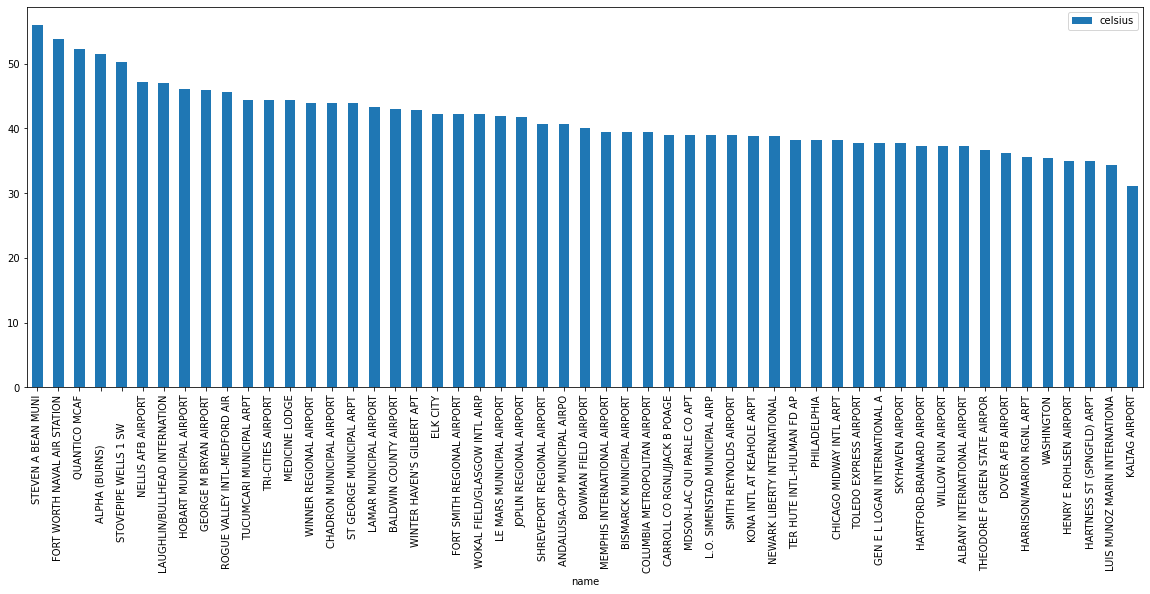

In [20]:
ax = df_cal.plot(kind='bar', x='name', y='celsius', figsize=(20,7))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


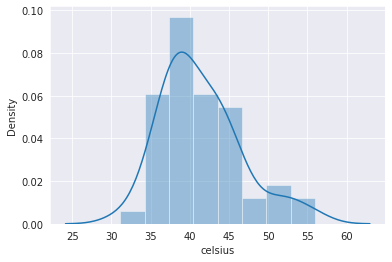

In [21]:
import seaborn as sns
sns.set_style('darkgrid')
sns.distplot(df_scc.celsius)

In [25]:
! pip install dash   
! pip install pandas
! pip install dash-daq
! pip install dash-html-components                                         
! pip install dash-core-components                                     
! !pip install plotly 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 642 kB 4.0 MB/s 
  Created wheel for dash-daq: filename=dash_daq-0.5.0-py3-none-any.whl size=669714 sha256=ec47ff783757490385995bc83bd5571e65f44f21e7e06b1587001bf1a2411d37
  Stored in directory: /root/.cache/pip/wheels/fe/54/53/a8d448db5592874db4313240571ca2c069e55f6a6b29bf5847
Successfully built dash-daq
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/bin/bash: !pip: command not found


In [28]:
import pandas as pd
import plotly.express as px
df = pd.read_csv('/content/sample_data/data.csv')
df.head()


,max,celsius,mo,da,state,stn,name
0,132.8,56.000000,6,26,ME,720472,STEVEN A BEAN MUNI
1,129.0,53.888889,8,7,TX,722595,FORT WORTH NAVAL AIR STATION
2,126.0,52.222222,7,30,VA,724035,QUANTICO MCAF
3,124.7,51.500000,5,5,WY,720977,ALPHA (BURNS)
4,122.4,50.222222,7,12,CA,999999,STOVEPIPE WELLS 1 SW


In [29]:
fig = px.line(df, x = 'celsius', y = 'state', title='Hottest states in USA (2022)')
fig.show()

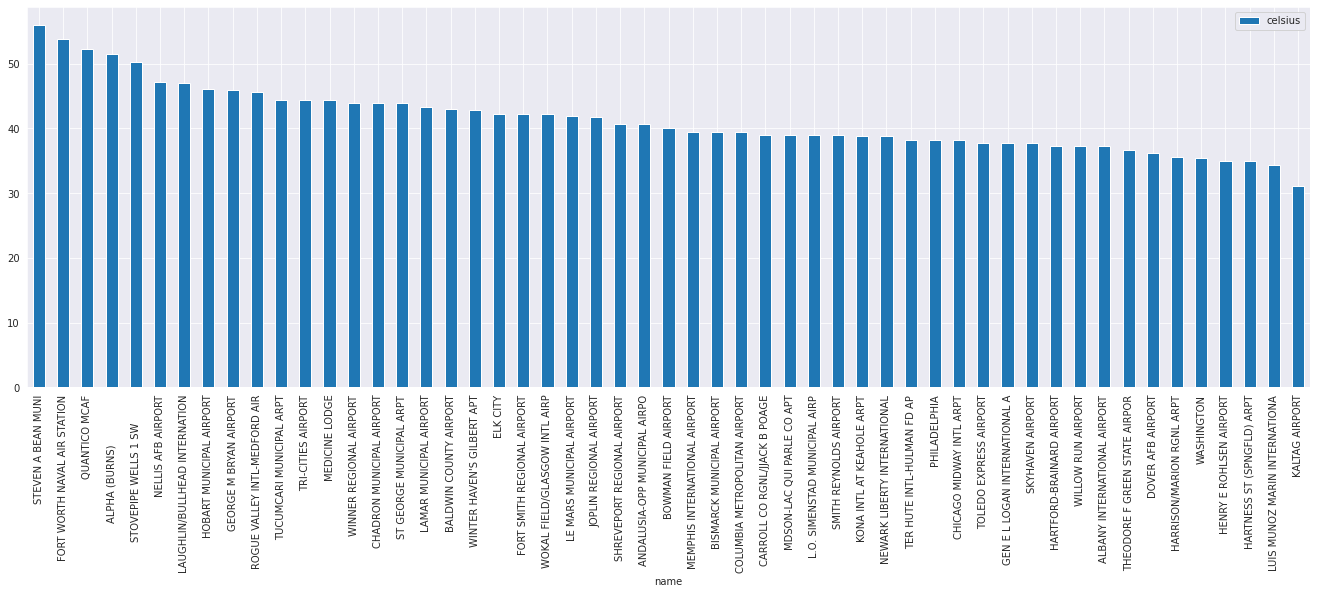

In [38]:
ax = df_cal.plot(kind='bar', x='name', y='celsius', figsize=(23,7))

In [31]:
fig = px.choropleth(df,locations='state', locationmode="USA-states", color='celsius', scope="usa")
 
fig.show()